In [62]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Reading the data 

In [63]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [64]:
tempCol = df[:]
catCol = tempCol.drop(['customerID','TotalCharges', 'MonthlyCharges','tenure','Churn'], axis=1)

print("General Stats::")
print(df.info())

print( 100*'-')

print("Summary Stats::" )

print 'Categorical Variables:'
print catCol.describe(include=['object', 'bool'])
print 100*'-'
print 'Numerical Variables:'
print tempCol[['tenure','MonthlyCharges','TotalCharges']].describe()
print( 100*'-')

print("Number of rows::",df.shape[0])
print("Number of columns::",df.shape[1] )

print( 100*'-')

print("Column Names:")
print df.columns.values.tolist()

print( 100*'-')

#Explore for missing values
print("Columns with Missing Values:",df.columns[df.isnull().any()].tolist())

General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1

In [65]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors = 'coerce') 
df.loc[df['TotalCharges'].isna()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


we can see from the General Stats that TotalCharges is not a float64 data type. This means there may be blanks in the data`

In [66]:
features = df.columns.values
print 100*'-'
for feature in features:
    print('Unique values for'+' '+str(feature)+': {}'.format(df[str(feature)].unique()))
    print 100*'-'

----------------------------------------------------------------------------------------------------
Unique values for customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
Unique values for gender: ['Female' 'Male']
----------------------------------------------------------------------------------------------------
Unique values for SeniorCitizen: [0 1]
----------------------------------------------------------------------------------------------------
Unique values for Partner: ['Yes' 'No']
----------------------------------------------------------------------------------------------------
Unique values for Dependents: ['No' 'Yes']
----------------------------------------------------------------------------------------------------
Unique values for tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 6

# Conversion of Categorical Variables to Numerical Variables

In [67]:
df['gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Partner'].replace(['Yes','No'],[1,0],inplace=True)
df['Dependents'].replace(['Yes','No'],[1,0],inplace=True)
df['PhoneService'].replace(['Yes','No'],[1,0],inplace=True) 
df['MultipleLines'].replace(['No phone service','No', 'Yes'],[0,0,1],inplace=True)
df['InternetService'].replace(['No','DSL','Fiber optic'],[0,1,2],inplace=True)
df['OnlineSecurity'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['OnlineBackup'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['DeviceProtection'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['TechSupport'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingTV'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['StreamingMovies'].replace(['No','Yes','No internet service'],[0,1,0],inplace=True)
df['Contract'].replace(['Month-to-month', 'One year', 'Two year'],[0,1,2],inplace=True)
df['PaperlessBilling'].replace(['Yes','No'],[1,0],inplace=True)
df['PaymentMethod'].replace(['Electronic check', 'Mailed check', 'Bank transfer (automatic)','Credit card (automatic)'],[0,1,2,3],inplace=True)
df['Churn'].replace(['Yes','No'],[1,0],inplace=True)


# Now our data is clean

We shall double check our data again

In [68]:
print("General Stats::")
print(df.info())

print( 100*'-')

print("Summary Stats::" )
print 'Categorical Variables:'
print catCol.describe(include=['object', 'bool'])
print 100*'-'
print 'Numerical Variables:'
print df[['tenure','MonthlyCharges','TotalCharges']].describe()
print( 100*'-')

print("Number of rows::",df.shape[0])
print("Number of columns::",df.shape[1] )

print( 100*'-')

print("Column Names:")
print df.columns.values.tolist()

print( 100*'-')

print("Columns with Missing Values:",df.columns[df.isnull().any()].tolist())

General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null int64
dtypes: float64(2), int64(18), o

In [69]:
features = df.columns.values
print 100*'-'
for feature in features:
    print('Unique values for'+' '+str(feature)+': {}'.format(df[str(feature)].unique()))
    print 100*'-'

----------------------------------------------------------------------------------------------------
Unique values for customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
----------------------------------------------------------------------------------------------------
Unique values for gender: [1 0]
----------------------------------------------------------------------------------------------------
Unique values for SeniorCitizen: [0 1]
----------------------------------------------------------------------------------------------------
Unique values for Partner: [1 0]
----------------------------------------------------------------------------------------------------
Unique values for Dependents: [0 1]
----------------------------------------------------------------------------------------------------
Unique values for tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 

# EPLORATORY DATA ANALYSIS

# Numerical Variables

In [70]:
numerical=['tenure','MonthlyCharges','TotalCharges']

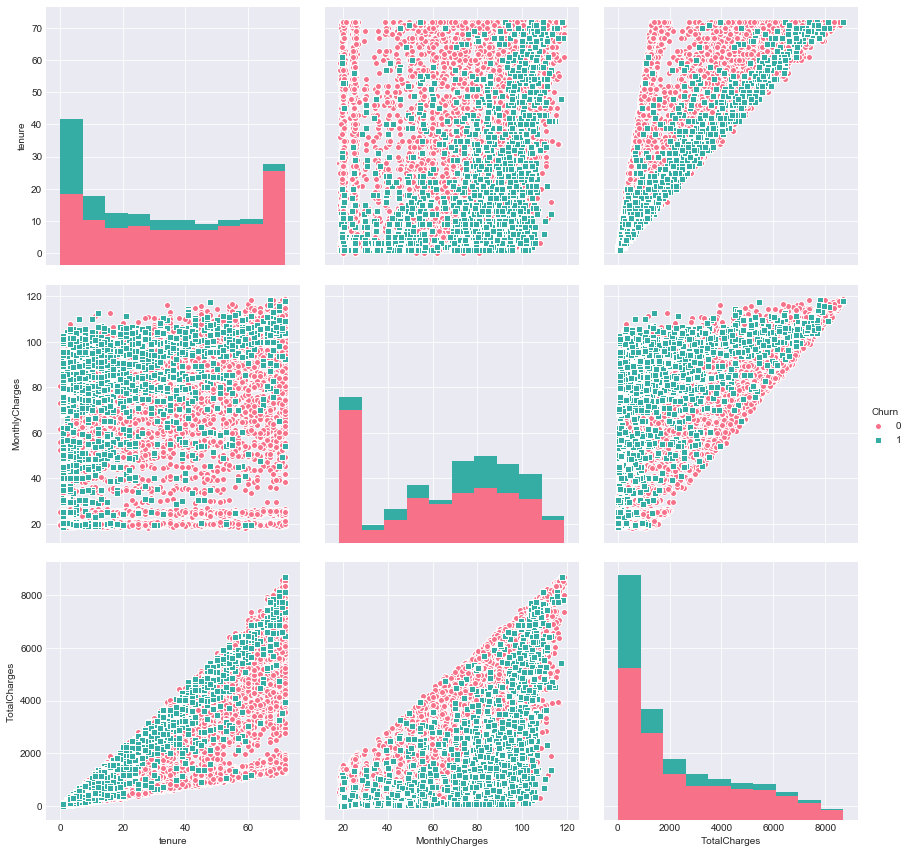

In [118]:
import seaborn as sns
#ScatterPlot Matrix
df_beforeAdjustment = df[:]
%config InlineBackend.figure_format = 'png'
sns.pairplot(df,vars=df[numerical],hue="Churn",markers=["o", "s"],palette="husl",size=4);
fig.tight_layout();

From the scatterplot matrix we can see that TotalCharges has correlation with MonthlyCharges and tenure.

Before deciding to remove TotalCharges , we shall explore the data in depth to see if there will be any siginficant loss of information if we remove it.

Text(0.5,1,'Distribution of TotalCharges by churn')

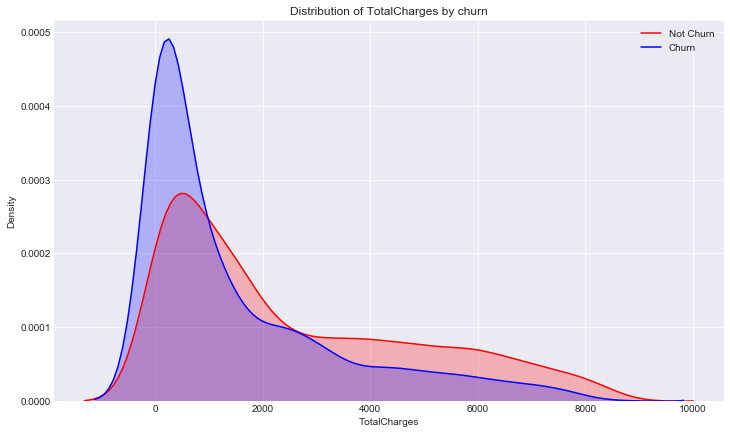

In [99]:
_, axes = plt.subplots(sharey=True, figsize=(12, 7))
sns.set_style("darkgrid")
ax = sns.kdeplot(df['TotalCharges'][(df["Churn"] == 0) ], 
                color="Red", shade = True)
ax = sns.kdeplot(df['TotalCharges'][df["Churn"] == 1 ],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('TotalCharges')
ax.set_title('Distribution of TotalCharges by churn')


The general concensus we have is that if the totalCharges are high , more customers will leave and if it is lower , more customers will stay.

From the density chart, we can see that for those customers that stay, most of them are paying TotalCharges in the lower range which is not surprising, because if it is cheaper for customers.

However:
One interesting detail that we can see is that for customers that left, most of them are also paying in the lower range. This means pricing is not the issue that made them leave , and that there it is due to other reasons , perhaps the customer service.

We shall visualise the data using the boxplot and the violin plot to look at the distribution.

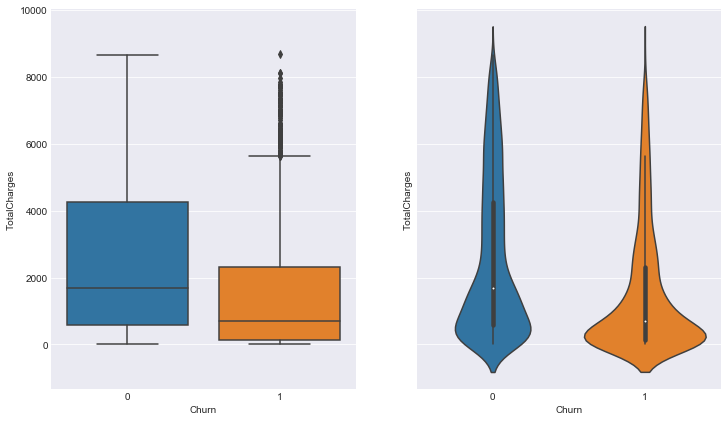

In [94]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 7))

sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='TotalCharges', data=df, ax=axes[1]);

From the boxplot , we can see that there are substantial amount of customers that actually leave because their totalCharges are exorbitant, but the majority of the customers that leave are those that actually paid less than the customers that stayed. 

This probably means that the price that the telco charge is not one of the main reason as to why customers churn.

# Exploring numerical variables without total charges

Now that we know TotalCharges is not that of a significant variable to look at , we shall remove it from our training feature 

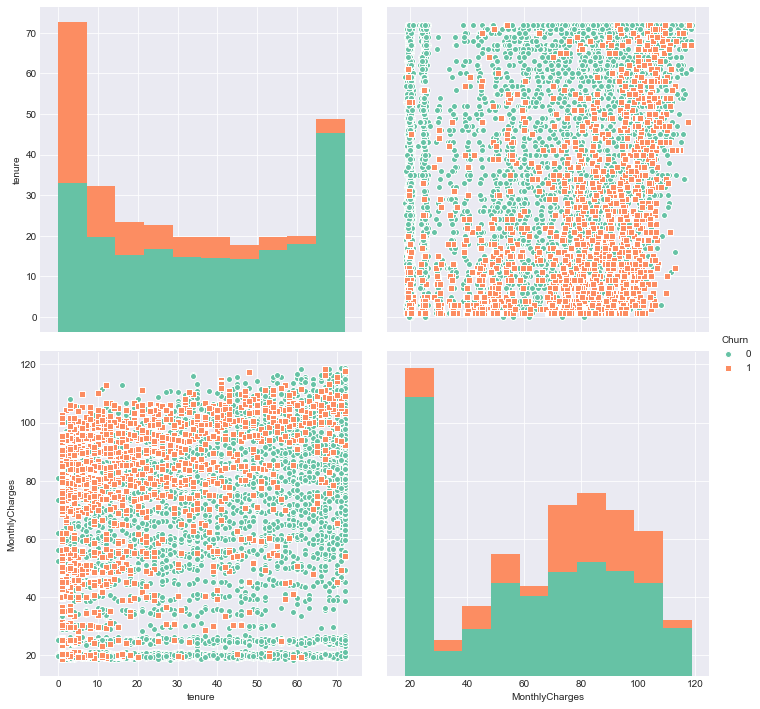

In [125]:
numerical_noTotal = ['tenure','MonthlyCharges']
%config InlineBackend.figure_format = 'png'
sns.pairplot(df,vars=df[numerical_noTotal],hue="Churn", markers=["o", "s"],palette="Set2",size=5);

After removing form our dataset , we can see that the numerical variables become more independent of each other.

Again, we look at the distribution of our data using the boxplot and violin plot to explore how significnat the features are.

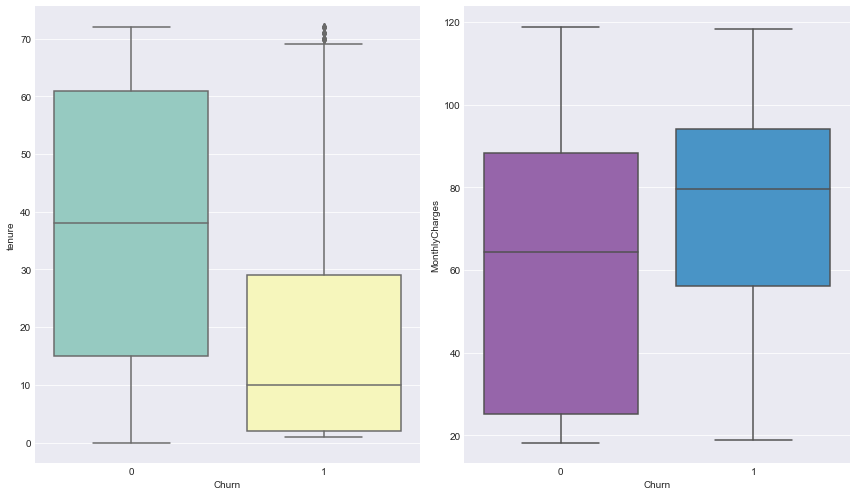

In [126]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 7))
sns.set_style("darkgrid")
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
for idx, feat in enumerate(numerical_noTotal):
    ax = axes[idx % 2]
    if feat=='MonthlyCharges':
        sns.boxplot(x='Churn', y=feat, data=df, ax=ax,palette=flatui)
    else:
        sns.boxplot(x='Churn', y=feat, data=df, ax=ax,palette="Set3")
    #ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout();

Violin Plot

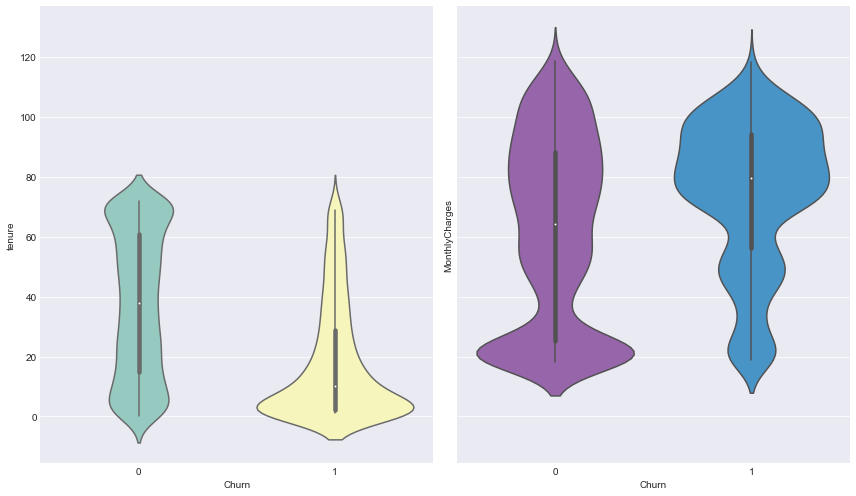

In [88]:
fig, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 7))

sns.violinplot(x='Churn', y='tenure', data=df, ax=axes[0],palette="Set3");

sns.violinplot(x='Churn', y='MonthlyCharges', data=df,ax=axes[1],palette=flatui);

fig.tight_layout();

Distribution Density

Text(0.5,1,'Distribution of MonthlyCharges and Tenure by churn')

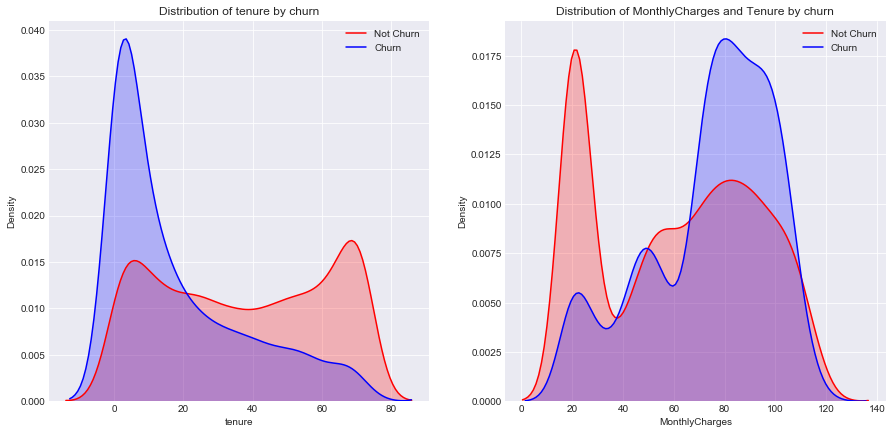

In [120]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
ax = sns.kdeplot(df['tenure'][df["Churn"] == 0 ],
                ax =axes[0],color="Red", shade = True)
ax = sns.kdeplot(df['tenure'][df["Churn"] == 1 ],
                ax =axes[0], color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('tenure')
ax.set_title('Distribution of tenure by churn')

ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 0 ],
                ax =axes[1],color="Red", shade = True)
ax = sns.kdeplot(df['MonthlyCharges'][df["Churn"] == 1 ],
                ax =axes[1], color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('MonthlyCharges')
ax.set_title('Distribution of MonthlyCharges and Tenure by churn')

Observation from boxplot and kdeplot of tenure: 
It is clear that customers that discontinue the telco are those that have shorter tenure, which makes sense intuitively, and thus we can say that the duration of the tenure is actually a significant variable.

Observation from MonthlyCharges:
Customers generally churn more when monthly charges are high. This makes sense intuitively , and thus , we can say that monthly charges is actually significant variable.

# Categorical Features

After exploring the numerical features , we shall now explore the categorical features. 
Our categorical features have already been converted into continuous variables using the global discretisation , using the replace function above.

To begin , we shall once again plot bargraphs to show the proportion of customers that churn in each respective categorical feature and see how important is the feature.

['gender' 'SeniorCitizen' 'Partner' 'Dependents' 'PhoneService'
 'MultipleLines' 'InternetService' 'OnlineSecurity' 'OnlineBackup'
 'DeviceProtection' 'TechSupport' 'StreamingTV' 'StreamingMovies'
 'Contract' 'PaperlessBilling' 'PaymentMethod']


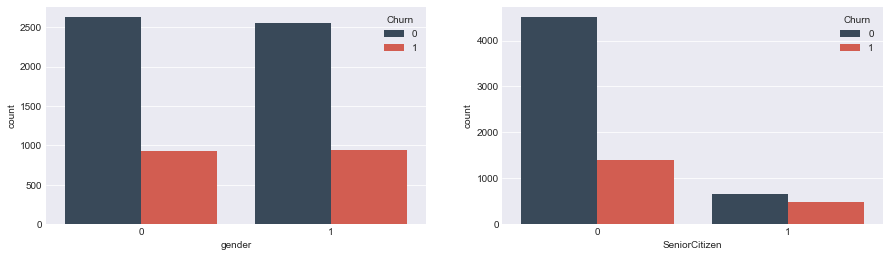

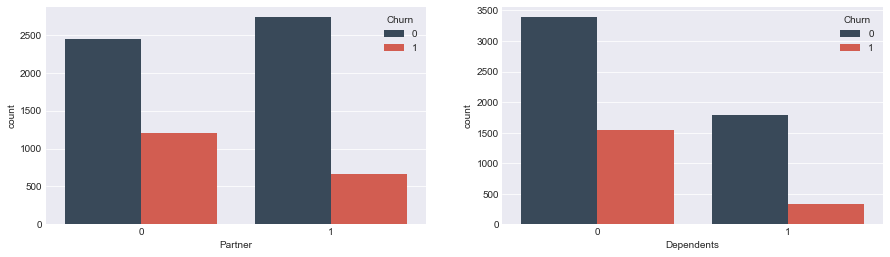

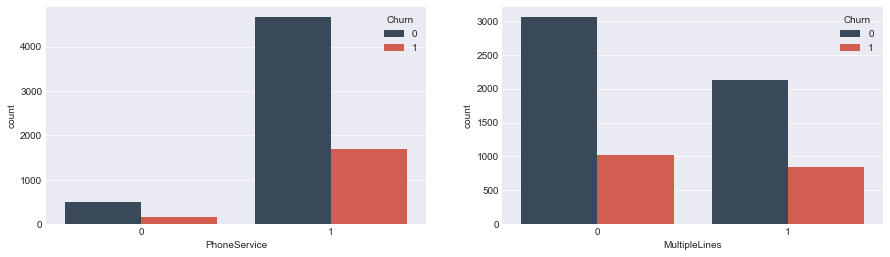

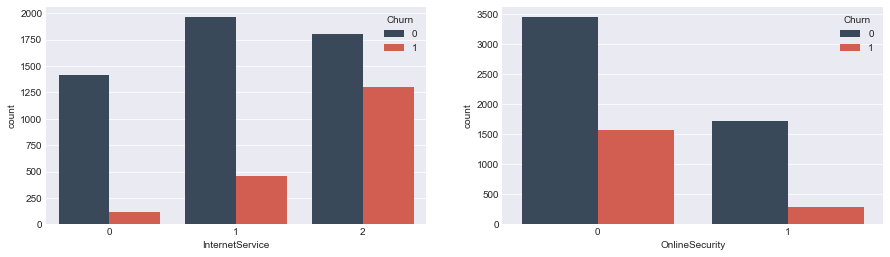

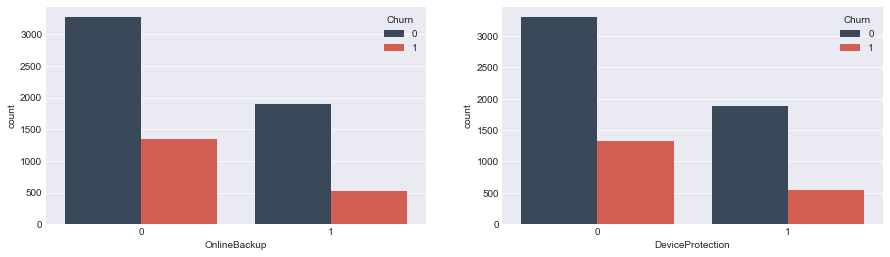

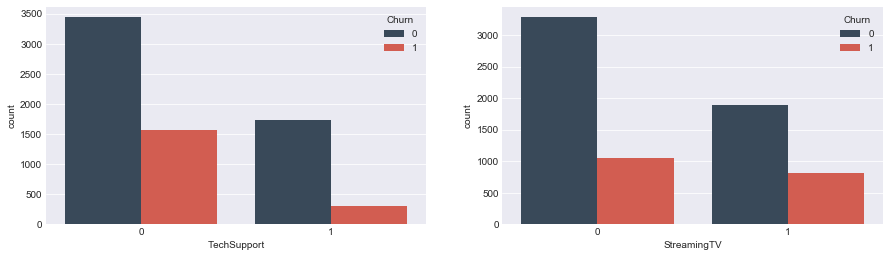

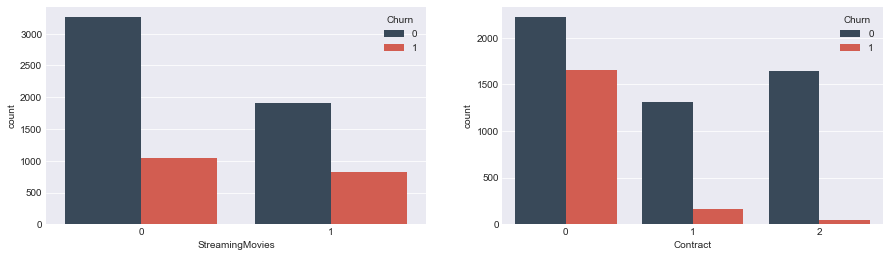

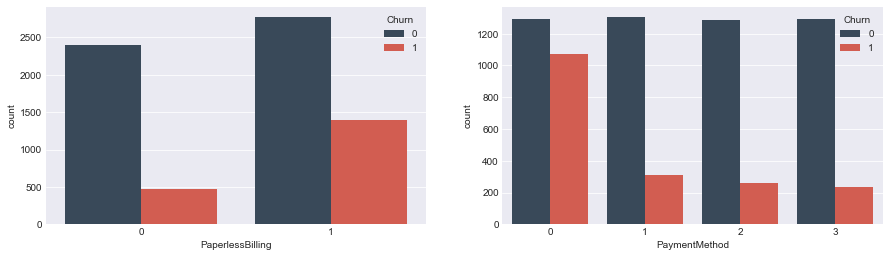

In [124]:
import seaborn as sns
##Categorical features
tempFeat = df[:]
catFeature = tempFeat.drop(['customerID','TotalCharges', 'MonthlyCharges','tenure','Churn'], axis=1).columns.values 

print catFeature
flatui=[ "#34495e","#e74c3c"]
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
count=0
for feat in catFeature:
    if count == 2:
        _, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
        count=0
    sns.countplot(x=feat,hue='Churn',data=df, ax=axes[count],palette=flatui);
    count+=1




In [42]:
for feat in catFeature:
    print pd.crosstab(df['Churn'], df[feat],normalize=True)
    print 100*'-'

gender         0         1
Churn                     
0       0.373420  0.361210
1       0.132046  0.133324
----------------------------------------------------------------------------------------------------
SeniorCitizen         0         1
Churn                            
0              0.640068  0.094562
1              0.197785  0.067585
----------------------------------------------------------------------------------------------------
Partner         0         1
Churn                      
0        0.347863  0.386767
1        0.170382  0.094988
----------------------------------------------------------------------------------------------------
Dependents         0         1
Churn                         
0           0.482891  0.251739
1           0.219083  0.046287
----------------------------------------------------------------------------------------------------
PhoneService         0         1
Churn                           
0             0.073974  0.660656
1             0.0

Gender: The proportion of customers that churn given their gender seems to be the same.

SeniorCitizen: The telco has a lot more customers that are not senior citizens , and senior citizens churn less compared to younger customers.

Partner: Proportion of customers that churn seems to vary in accordance to partner , possible hypothesis is that couples want to have the same telco.

Dependents: Proportion of customers that churn varies in accordance to dependents, possible hypothesis dependents dont have the money to change telco.
Phone Service: Proportion of customers that have phone service and no phone service differ too much and thus the data is not reliable.

MultipleLines: The proportion of customers that churn and not churn seems to be the same , and thus variable does not seem to be significant.

InternetService:The proportion of Customers that churn differs hugely according to whether or not they have internet service(0), DSL(1) or Fiber optic(2).Hypothesis: Competition from other telcos w.r.t providing quality internet service for different types of internet medium.

OnlineSecurity: More customer churn when they have no OnlineSecurity. This is reasonable as signing up for OnlineSecurity generally means the customer plans to stay with the telco for longer durations or at least until it expires.

OnlineBackup:There is a greater proportion of customers that churn when they dont have online backup.This is reasonable as customers that bother to have onlineBackup with the company tend to stick with the telco longer.

DeviceProtection:There is a greater proportion of customers that churn when they dont have DeviceProtection.This is reasonable as customers that bother to sign up for deviceProtection intend to stick with company longer.

TechSupport: Greater proportion of customers that churn when they dont have techSupport. This means that the techsupport provided by the telco is good , which lead to customers loving the company more.

StreamingTv: Greater proportion of customers churn when they streamTv.Possible explanation is that the telco's television streaming service is not that good , and led the customers to switching telcos.

StreamingMovies:Greater proportion of customers churn when they streamMoives.Possible explanation is that the telco's movie streaming service is not that good , and led the customers to switching telcos.

Contract:Huge decrease in proportion of customers that churn if they extent their contract from Month to Month to one year. This means that the company should set up advertisements to promote customers to buy the one year plan.

PaperlessBilling: greater proportion of customers churn when they use paperlessBilling , probably because it is more convenient for them to switch and there is no sentiment built with telco when using paperless billing.

PaymentMethod: There is a huge greater proportion of customers that churn when they use Electronic checks(0). Telco company should ban the use of electronic checks since it is shown that customers leave more often than using Mailed check(1),Bank transfer (automatic)(2),Credit card (automatic)(3)

    


We can see that features InternetService , Contract and PaymentMethod seem to have the greatest difference in churn rate with respect to their own classfications , and we can predict that these features are probably features that contain significant importance. 

It is not certain , but this is something that we can keep in mind while we explore our data further.


# Correlation of Features

After looking at the numerical and categorical features separately , we shall now look at the correlation of all the features.

This is important because high correlation affects the accuracy of our model since predictive models assume the independence between variables.

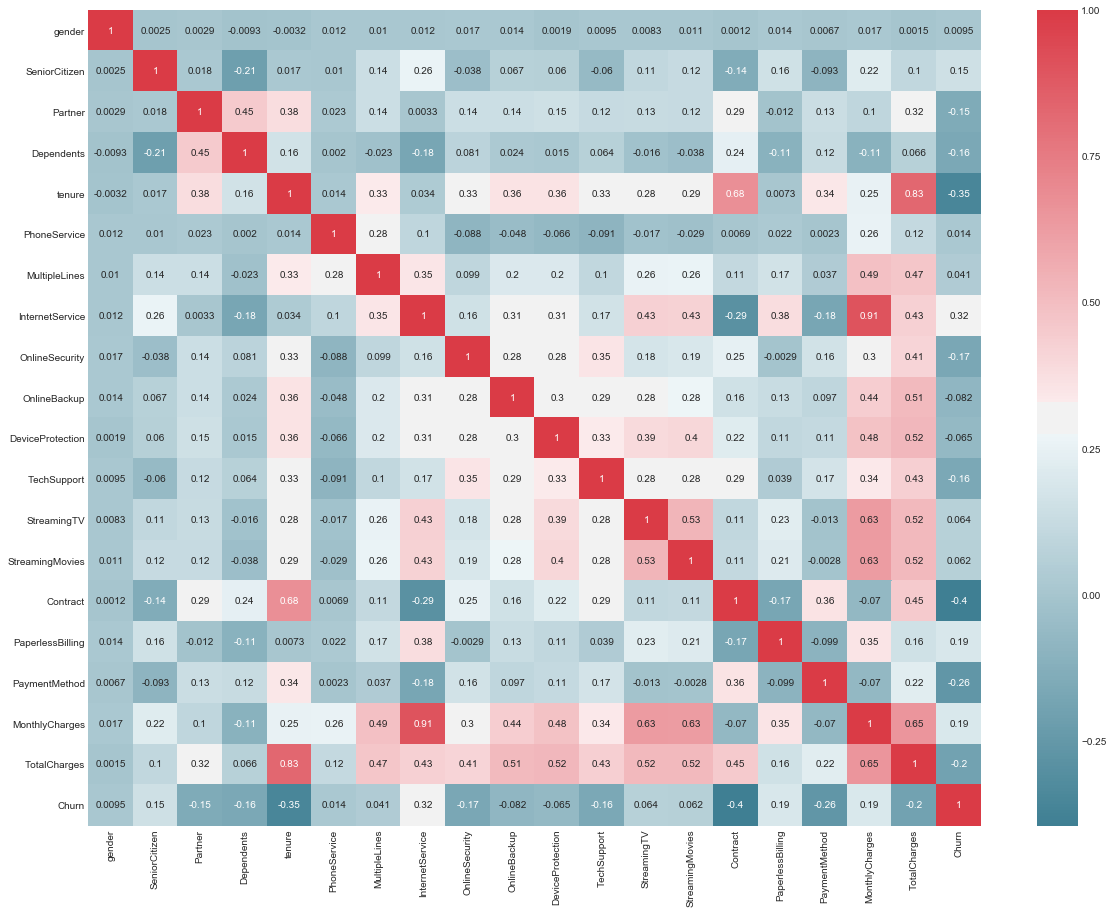

In [45]:
corr= df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
heat_map = plt.gcf() 
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


Total charges and monthly charges are highly correlated as seen from the heatmap above. 
Since'TotalCharges' is highly correlated to both 'Tenure' and 'MonthlyCharges' , it is reasonable enough to drop the 'TotalCharges' variable.

Moreover , this is substantiated by the E.D.A of numerical variables above.

#we can try to drop Monthly Charges as well since it has extremely high correlation with other values

In [127]:
df=df.drop('TotalCharges', axis=1)

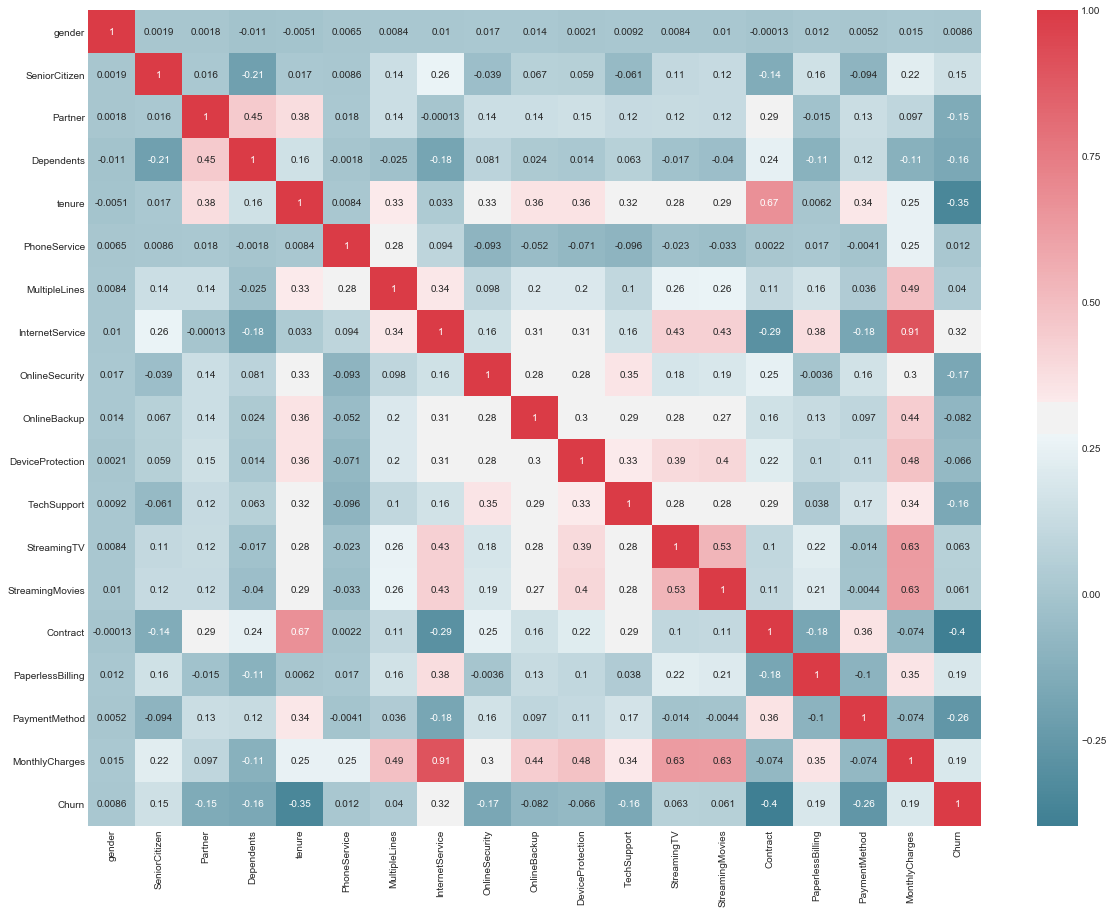

In [128]:
import seaborn as sns
corr= df.corr()
fig, ax = plt.subplots(figsize=(10, 10))
colormap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,cmap=colormap,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True,annot_kws={'size':10})
heat_map = plt.gcf() 
heat_map.set_size_inches(20,15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

From the above correlation matrix , we can see that the correlation Monthly charges has actually quite a bit of correlation with other features. 

However , based on our exploration of Monthly Charges in terms of boxplot and violin plot , we can see that MonthlyCharges actually contains significant information that will be lost if we remove it.

Hence , we shall keep MonthlyCharges in the training dataset.

# Predictive Modelling

Assess if our data is balanced because this may cause our data to be biased

In [129]:
#see if data is balanced
df['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Since the proportion of data with each label is not the same,there is some bias in our data and hence we shall attempt to balance it using resampling

In [130]:
from sklearn.utils import resample
data_majority = df[df['Churn']==0]
data_minority = df[df['Churn']==1]

In [131]:
data_minority_upsampled = resample(data_minority,
replace=True,
n_samples=5174,
random_state=1) 
# Combine resampled results
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

data_upsampled['Churn'].value_counts()

1    5174
0    5174
Name: Churn, dtype: int64

Data is now Balanced

# Set up our training and testing data

setting aside 25% of data for testing and the other 75% for training to prevent overfitting

In [261]:
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
features = data_upsampled.iloc[:,1:]
X = features.iloc[:,:-1]
y= features.iloc[:,-1]
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25,random_state=12345)


# Logistic Regression

Using a logistic regression model with initially random hyper-parameters.

----------------------------------------------------------------------------------------------------
Intercept: [0.0242864]
Regression: [[ 0.05527452  0.23192792 -0.01377318 -0.17038957 -0.03095265  0.5237375
   0.47503236  1.97025383 -0.16089759  0.1734058   0.20873027 -0.18862396
   0.72061862  0.78835107 -0.70929973  0.27956643 -0.13412161 -0.04430232]]
Accuracy of logistic regression classifier on test set: 0.78
             precision    recall  f1-score   support

          0       0.78      0.75      0.76      1242
          1       0.78      0.80      0.79      1345

avg / total       0.78      0.78      0.78      2587

----------------------------------------------------------------------------------------------------


Text(0.5,19.5,'Predicted label')

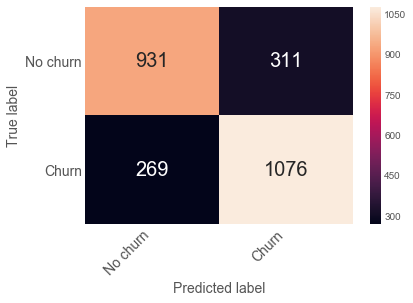

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
 
logisticRegr = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
logisticRegr.fit(X=train_x, y=train_y)
print 100*'-'
test_y_pred = logisticRegr.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr.intercept_))
print('Regression: ' + str(logisticRegr.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
print 100*'-'
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

Tune the hyper paramter using gridSearch 

In [140]:
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

penalty = ['l1', 'l2']

logistic=LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=100, random_state=12345)
C = np.logspace(0, 4, 10)

hyperparameters = dict(C=C, penalty=penalty)

clf = GridSearchCV(logistic, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(train_x, train_y)

print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

('Best Penalty:', 'l2')
('Best C:', 2.7825594022071245)


Penalty affects how sparse the solutions we get , and C affects the degree of regularization which affects the complexity of model.

----------------------------------------------------------------------------------------------------
Intercept: [0.02512802]
Regression: [[ 0.05585858  0.23154926 -0.01373671 -0.16953234 -0.0309297   0.21577186
   0.39754089  1.58469595 -0.23639007  0.09604655  0.13207208 -0.2649511
   0.56595909  0.63467983 -0.7088034   0.28098545 -0.13463625 -0.02891592]]
Accuracy of logistic regression classifier on test set: 0.78
             precision    recall  f1-score   support

          0       0.78      0.75      0.76      1242
          1       0.78      0.80      0.79      1345

avg / total       0.78      0.78      0.78      2587

----------------------------------------------------------------------------------------------------


Text(0.5,19.5,'Predicted label')

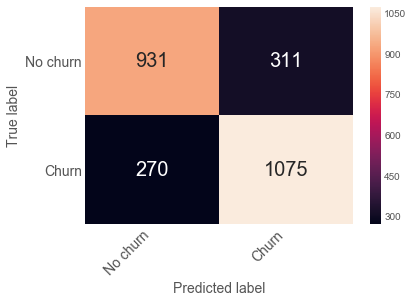

In [166]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
logisticRegr2 = LogisticRegression(fit_intercept=True, max_iter=1000, tol=2e-9, penalty='l2', C=2.7825594022071245, random_state=12345)
logisticRegr2.fit(X=train_x, y=train_y)
print 100*'-'
test_y_pred = logisticRegr2.predict(test_x)
confusion_matrix = confusion_matrix(test_y, test_y_pred)
print('Intercept: ' + str(logisticRegr2.intercept_))
print('Regression: ' + str(logisticRegr2.coef_))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logisticRegr2.score(test_x, test_y)))
print(classification_report(test_y, test_y_pred))
print 100*'-'
confusion_matrix_df = pd.DataFrame(confusion_matrix, ('No churn', 'Churn'), ('No churn', 'Churn'))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={"size": 20}, fmt="d")
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize = 14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize = 14)
plt.ylabel('True label', fontsize = 14)
plt.xlabel('Predicted label', fontsize = 14)

In [160]:
print ('Before Tuning:' ,logisticRegr.score(test_x, test_y))
print ('After Tuning:',accuracy_score(test_y, best_model.predict(test_x)))

('Before Tuning:', 0.7758020873598763)
('After Tuning:', 0.7754155392346347)


Compare the result using ROC_curve

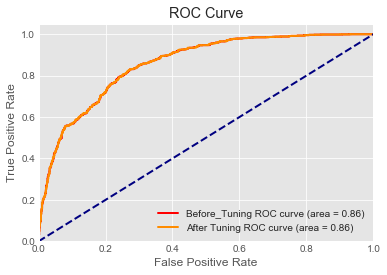

In [155]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

y1_predict_probabilities = logisticRegr.predict_proba(test_x)[:,1]
y1_fpr, y1_tpr, _ = roc_curve(test_y, y1_predict_probabilities)
y1_roc_auc = auc(y1_fpr, y1_tpr)

y_predict_probabilities = best_model.predict_proba(test_x)[:,1]
fpr, tpr, _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(y1_fpr, y1_tpr, color='red',
         lw=2, label='Before_Tuning ROC curve (area = %0.2f)' % y1_roc_auc)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='After Tuning ROC curve (area = %0.2f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion: There is not much difference after tuning 

# Decision Trees : pre-pruning and unpruned


In [257]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
X_train, X_holdout, y_train, y_holdout=train_x, test_x, train_y, test_y 

In [168]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=5, random_state=17)
tree.fit(X_train, y_train)
tree_pred = tree.predict(X_holdout)
accuracy_score(y_holdout, tree_pred) # 0.94

0.7816003092385002

In [169]:
from sklearn.model_selection import GridSearchCV, cross_val_score

tree_params = {'max_depth': range(1,11),
               'max_features': range(4,19)}

tree_grid = GridSearchCV(tree, tree_params,
cv=5, n_jobs=-1,
verbose=True)

tree_grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.7s
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:    8.0s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_features': [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [170]:
tree_grid.best_params_

{'max_depth': 10, 'max_features': 15}

In [171]:
accuracy_score(y_holdout, tree_grid.predict(X_holdout))

0.8067259373792037

In [172]:
from ipywidgets import Image
from io import StringIO,BytesIO
import StringIO
import pydotplus 
from sklearn.tree import export_graphviz
dot_data=StringIO.StringIO()
export_graphviz(tree_grid.best_estimator_, feature_names=X.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.749046 to fit



SW1hZ2UodmFsdWU9J1x4ODlQTkdcclxuXHgxYVxuXHgwMFx4MDBceDAwXHJJSERSXHgwMFx4MDBceDdmXHhmZlx4MDBceDAwXHgwNEtceDA4XHgwNlx4MDBceDAwXHgwMCZceGM2XHhkM1x4OGbigKY=


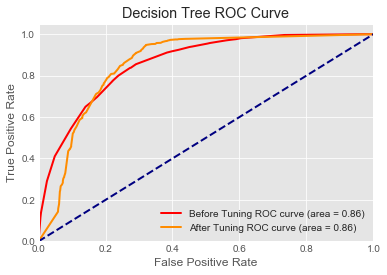

In [174]:
#train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.25)
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

t_model = tree
t_y_predict_probabilities = t_model.predict_proba(test_x)[:,1]

t_fpr, t_tpr, _ = roc_curve(test_y, t_y_predict_probabilities)
t_roc_auc = auc(t_fpr, t_tpr)


model = tree_grid
y_predict_probabilities = model.predict_proba(test_x)[:,1]

fpr, tpr, _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(t_fpr, t_tpr, color='red',
         lw=2, label='Before Tuning ROC curve (area = %0.2f)' % t_roc_auc)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='After Tuning ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion: we can see that at certain time ,the pre-pruned tree is better

# KneighbourClassifier

In [175]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [176]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [177]:
knn_pred = knn.predict(X_holdout)
accuracy_score(y_holdout, knn_pred) # 0.88

0.7742558948589099

Tune the n_neighbours

In [179]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

knn_pipe = Pipeline([('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_jobs=-1))])

knn_params = {'knn__n_neighbors': range(4, 18)}

knn_grid = GridSearchCV(knn_pipe, knn_params,
cv=5, n_jobs=-1,
verbose=True)

knn_grid.fit(X_train, y_train)

knn_grid.best_params_, knn_grid.best_score_

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:   22.6s finished


({'knn__n_neighbors': 10}, 0.751449555469656)

In [183]:
accuracy_score(y_holdout, knn_grid.predict(X_holdout))

0.7765751836103595

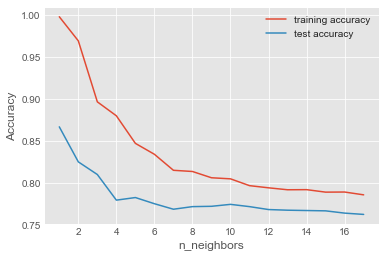

In [184]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []

neighbors_settings = range(1, 18)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(train_x, train_y)
    training_accuracy.append(knn.score(train_x, train_y))
    test_accuracy.append(knn.score(test_x, test_y))
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
plt.savefig('knn_compare_model')

The above plot shows the training and test set accuracy on the y-axis against the setting of n_neighbors on the x-axis. Considering if we choose one single nearest neighbor, the prediction on the training set is perfect. But when more neighbors are considered, the training accuracy drops, indicating that using the single nearest neighbor leads to a model that is too complex. The best performance is somewhere around 10 neighbours , which corresponds the value returned by gridsearch

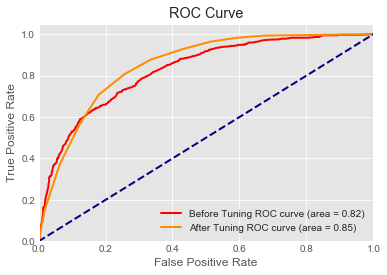

In [190]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

b_model = knn
b_y_predict_probabilities = b_model.predict_proba(test_x)[:,1]

b_fpr, b_tpr, _ = roc_curve(test_y, b_y_predict_probabilities)
b_roc_auc = auc(b_fpr, b_tpr)

model = knn_grid
y_predict_probabilities = model.predict_proba(test_x)[:,1]

fpr, tpr, _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(b_fpr, b_tpr, color='red',
         lw=2, label='Before Tuning ROC curve (area = %0.2f)' % b_roc_auc)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='After Tuning ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion: we can see that after tuning , the model improved.

# RandomForest

In [280]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17)

print(np.mean(cross_val_score(forest, X_train, y_train, cv=5))) 

0.8734695200489705


In [281]:
"""Grid Search for RandomForsest"""
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [3, 10, 30, 100, 500], 'max_features': [2, 4, 6, 8],'max_leaf_nodes': [2,4,6,8,16]}, 
{'bootstrap': [False]},
]

rf_classifier = RandomForestClassifier( n_jobs=-1 )
print("# Tuning hyper-parameters for accuracy\n")
clf = GridSearchCV(rf_classifier, forest_params, cv=5, scoring='accuracy',)
clf.fit(X_train, y_train)
print("Grid scores for all the models based on CV:\n")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.5f (+/-%0.05f) for %r" % (mean, std * 2, params))
print("\nBest parameters set found on development set:", clf.best_params_)
print("Best model validation accuracy:", clf.best_score_)

# Tuning hyper-parameters for accuracy

Grid scores for all the models based on CV:

0.73483 (+/-0.03940) for {'max_features': 4, 'max_depth': 1}
0.72955 (+/-0.02204) for {'max_features': 5, 'max_depth': 1}
0.73521 (+/-0.01792) for {'max_features': 6, 'max_depth': 1}
0.72993 (+/-0.04545) for {'max_features': 7, 'max_depth': 1}
0.73960 (+/-0.03451) for {'max_features': 8, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 9, 'max_depth': 1}
0.73560 (+/-0.04085) for {'max_features': 10, 'max_depth': 1}
0.72426 (+/-0.01857) for {'max_features': 11, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 12, 'max_depth': 1}
0.72787 (+/-0.02051) for {'max_features': 13, 'max_depth': 1}
0.73225 (+/-0.01999) for {'max_features': 14, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 15, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 16, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 17, 'max_depth': 1}
0.72645 (+/-0.01880) for {'max_features': 18, 'max_de

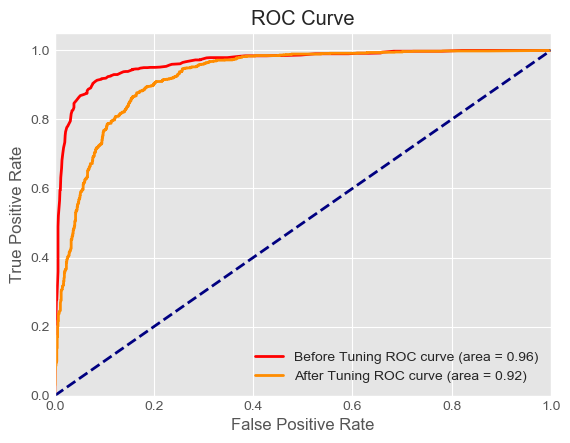

In [285]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

r_model = forest
r_model.fit(X_train, y_train)
r_y_predict_probabilities = r_model.predict_proba(test_x)[:,1]

r_fpr, r_tpr, _ = roc_curve(test_y,r_y_predict_probabilities)
r_roc_auc = auc(r_fpr, r_tpr)


model = clf
y_predict_probabilities = model.predict_proba(test_x)[:,1]

fpr, tpr, _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(r_fpr, r_tpr, color='red',
         lw=2, label='Before Tuning ROC curve (area = %0.2f)' % r_roc_auc)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='After Tuning ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

We see that the randomForest performs worst with hyper parameters tune , this means there is overfitting (the hyperparameters) on that specific test set resulting from your chosen train-test split.

# Feature Importance

Since we know that there is over fitting , we will look at the featureImportance in Randomforest

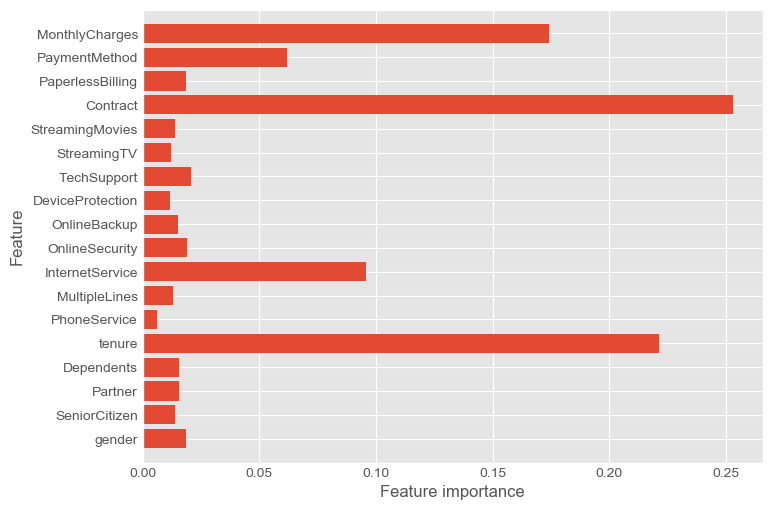

In [286]:
def plot_feature_importances_rf(model):
    plt.figure(figsize=(8,6))
    n_features = len(train_x.columns.values)
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train_x.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
rf_classifier = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=17,max_features=9,max_depth=10)
rf_classifier.fit(X_train, y_train)
plot_feature_importances_rf(rf_classifier)
#plt.savefig('feature_importance') #--> this is to download the picture

In [287]:
important_Feat=['MonthlyCharges','tenure','PaymentMethod','Contract','InternetService']
final_features = data_upsampled[important_Feat].iloc[:,1:]
# Features are in train and labels are in train_labels
final_X = final_features.iloc[:,:-1]
final_y= features.iloc[:,-1]
train_xf, test_xf, train_yf, test_yf = train_test_split(final_X,final_y,test_size=0.25,random_state=12345)
forest2 = RandomForestClassifier(n_estimators=100, n_jobs=-1, 
                                random_state=12345,max_features=3,max_depth=10)
forest2 = forest.fit(train_xf,train_yf)
print(np.mean(cross_val_score(forest2, train_xf, train_yf, cv=5))) 

0.7447427525600241


From the above , we can see that if we reduce the number of features to just the top 3 features of importance, the accuracy of the random forest drops drastically.
This is because the other features have importance in them , as we explored in our EDA , and removing them will remove variables that affect customer churn.

From the above chart , with just 5 feature , we are already able to explain 75% of our data.

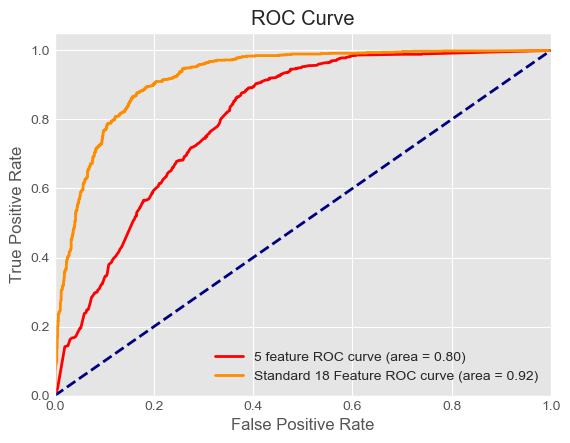

In [289]:
r_model = forest2
r_model.fit(train_xf, train_yf)
r_y_predict_probabilities = r_model.predict_proba(test_xf)[:,1]

r_fpr, r_tpr, _ = roc_curve(test_yf,r_y_predict_probabilities)
r_roc_auc = auc(r_fpr, r_tpr)


model = clf
#model.fit(X_train, y_train)
y_predict_probabilities = model.predict_proba(test_x)[:,1]

fpr, tpr, _ = roc_curve(test_y, y_predict_probabilities)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(r_fpr, r_tpr, color='red',
         lw=2, label='5 feature ROC curve (area = %0.2f)' % r_roc_auc)
plt.plot(fpr, tpr, color='darkorange',
         lw=2, label='Standard 18 Feature ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

From the above roc , we can see that a great proporption can be explained by just 5 features , as compared to using all the feature. 

To reduce the computational complexity and improve model computational speed , the company may consider just having the 5 features to do predictive modelling. 

# Comparison Of Models

Now , we will compare the models : LogisticRegression , Decision Tree , RandomForest and K Nearest Neighbour to determine which is the best model to be used.

Because using all the features will eventually lead to an overfitting of dataSet , we shall compare the models that have their hyper parameters tuned to give a  more representative comparison of which is the best

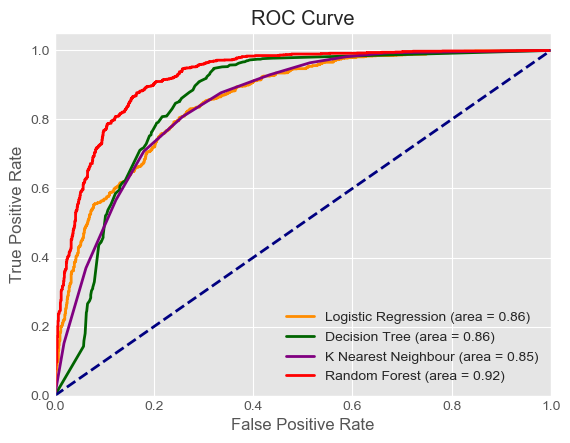

In [292]:
from sklearn.linear_model import LogisticRegression

##logistic Regression
lr_model = best_model
lr_predict_probabilities = lr_model.predict_proba(test_x)[:,1]

lr_fpr, lr_tpr, _ = roc_curve(test_y, lr_predict_probabilities)
lr_roc_auc = auc(lr_fpr, lr_tpr)

##Decision Tree
dc_model = tree_grid
#model.fit(X_train, y_train)
dc_y_predict_probabilities = dc_model.predict_proba(test_x)[:,1]

dc_fpr, dc_tpr, _ = roc_curve(test_y, dc_y_predict_probabilities)
dc_roc_auc = auc(dc_fpr, dc_tpr)

##Decision Tree
knn_model = knn_grid
#model.fit(X_train, y_train)
knn_y_predict_probabilities = knn_model.predict_proba(test_x)[:,1]

knn_fpr, knn_tpr, _ = roc_curve(test_y, knn_y_predict_probabilities)
knn_roc_auc = auc(knn_fpr, knn_tpr)

##RandomForst
rf_model=clf
#rf_model.fit(X_train, y_train)
rf_y_predict_probabilities = rf_model.predict_proba(test_x)[:,1]

rf_fpr, rf_tpr, _ = roc_curve(test_y, rf_y_predict_probabilities)
rf_roc_auc = auc(rf_fpr, rf_tpr)


plt.figure()
plt.plot(lr_fpr, lr_tpr, color='darkorange',
         lw=2, label='Logistic Regression (area = %0.2f)' % lr_roc_auc)
plt.plot(dc_fpr, dc_tpr, color='darkgreen',
         lw=2, label='Decision Tree (area = %0.2f)' % dc_roc_auc)
plt.plot(knn_fpr, knn_tpr, color='purple',
         lw=2, label='K Nearest Neighbour (area = %0.2f)' % knn_roc_auc)
plt.plot(rf_fpr, rf_tpr, color='red',
         lw=2, label='Random Forest (area = %0.2f)' % rf_roc_auc)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

Conclusion: 

From the Roc , since the AUC of RandomForest is better greater than the other models, RandomForest model is the best model for predicting customer churn , since the AUC is the best.

The models accuracy is 0.8319804148949878

# Bagging 

Lets say the telco wants to discover if they are charging their costs too high , which led to customer churn , they can actually construct a model for the numerical variables to explore the feature significance.

In [244]:
%matplotlib inline

import itertools
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec


from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score, train_test_split

from mlxtend.plotting import plot_learning_curves
from mlxtend.plotting import plot_decision_regions

np.random.seed(0)

For the numerical modelling , we exclude TotalCharges as we already established the correlation of TotalCharges with the other numerical data

We will train the numerical feature data sets on Decision Tree , Knn , and subsequently bagging of Decision Tree and Bagging of KNN

In [246]:

numerical_features=['MonthlyCharges','tenure']
features = data_upsampled.iloc[:,1:]
wanted_X = features.iloc[:,:-1]
wanted_y= features.iloc[:,-1]

X=wanted_X[numerical_features].as_matrix()
#X=wanted_X.as_matrix()
y = wanted_y.as_matrix()

clf1 = DecisionTreeClassifier(criterion='entropy', max_depth=1)
clf2 = KNeighborsClassifier(n_neighbors=1)  

bagging1 = BaggingClassifier(base_estimator=clf1, n_estimators=10, max_samples=0.8, max_features=0.8)
bagging2 = BaggingClassifier(base_estimator=clf2, n_estimators=10, max_samples=0.8, max_features=0.8)


Accuracy: 0.68 (+/- 0.00) [Decision Tree]
Accuracy: 0.84 (+/- 0.00) [K-NN]
Accuracy: 0.69 (+/- 0.01) [Bagging Tree]
Accuracy: 0.67 (+/- 0.00) [Bagging K-NN]


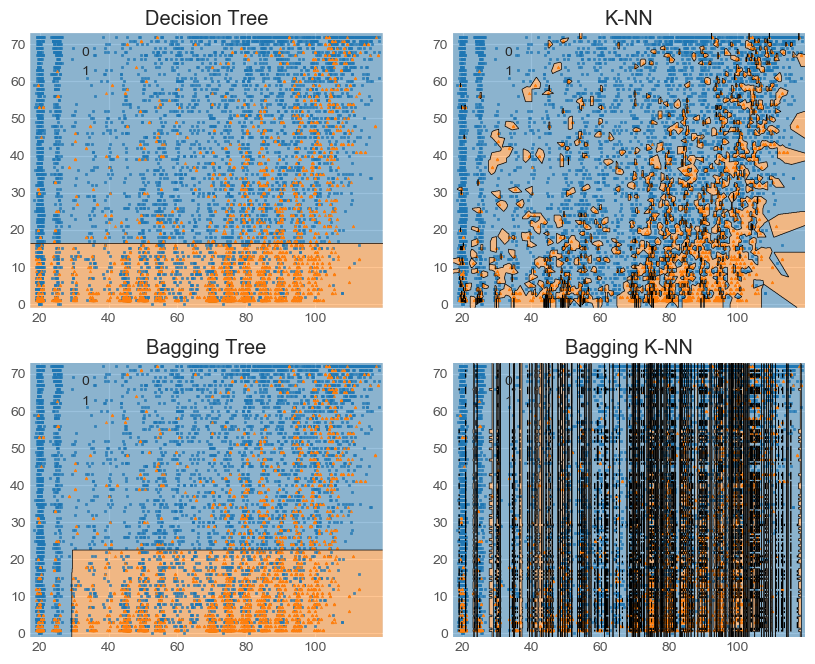

In [248]:
label = ['Decision Tree', 'K-NN', 'Bagging Tree', 'Bagging K-NN']
clf_list = [clf1, clf2, bagging1, bagging2]

fig = plt.figure(figsize=(10, 8))
gs = gridspec.GridSpec(2, 2)
grid = itertools.product([0,1],repeat=2)
scatter_kwargs = {'s': 3, 'edgecolor': None, 'alpha': 0.8}
for clf, label, grd in zip(clf_list, label, grid):        
    scores = cross_val_score(clf, X, y, cv=3, scoring='accuracy')
    print "Accuracy: %.2f (+/- %.2f) [%s]" %(scores.mean(), scores.std(), label)
        
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2, scatter_kwargs=scatter_kwargs)
    plt.title(label)

plt.show()

As we can see from above , Decision Tree and KNN Tree alone seems to be a better performer than their bagging. This is most probably due to overfitting of the model.

Knn with an accuracy of 0.84 is also the best model for just classifying customers based on their financial aspect.

To know if we have overfitting of our data:

In [249]:
#Ensemble Size
num_est = map(int, np.linspace(1,100,20))
bg_clf_cv_mean = []
bg_clf_cv_std = []
for n_est in num_est:    
    bg_clf = BaggingClassifier(base_estimator=clf1, n_estimators=n_est, max_samples=0.8, max_features=0.8)
    scores = cross_val_score(bg_clf, X, y, cv=3, scoring='accuracy')
    bg_clf_cv_mean.append(scores.mean())
    bg_clf_cv_std.append(scores.std())

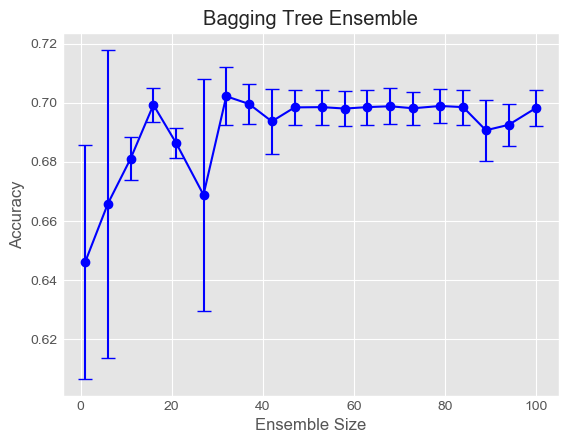

In [250]:
plt.figure()
(_, caps, _) = plt.errorbar(num_est, bg_clf_cv_mean, yerr=bg_clf_cv_std, c='blue', fmt='-o', capsize=5)
for cap in caps:
    cap.set_markeredgewidth(1)                                                                                                                                
plt.ylabel('Accuracy'); plt.xlabel('Ensemble Size'); plt.title('Bagging Tree Ensemble');
plt.show()

From the above figure , we can see that accuracy generally increases until base estimator 35 and then plateau after , and adding base estimators beyond this point will not improve our accuracy, and there is probably overfitting

It will be better if we have more numerical features to model on